## Introduction

The level of daily physical activity is a crucial indicator when assessing the health of an individual or a group. The World Health Organization (WHO) and other health agencies emphasize that adults should engage in at least 30 minutes of moderate-intensity activity per day on weekdays, to maintain physical fitness and reduce the risk of chronic diseases. These recommendations not only help improve cardiovascular health, but also aid in weight control, strengthen the immune system and improve overall quality of life. However, meeting the recommendation of at least 30 minutes of moderate-intensity activity per day remains a challenge for many people.

To explore our driving problem, we analyzed daily exercise data from 30 individuals collected by Amazon Mechanical Turk from March 12 2016, to May 12, 2016. 

## Initial Assumption

* Assuming the participants are randomly selected and the observations are independent from each other
* Moderate Activity: daily step count ranging above 7,500
  * The definition is from: https://www.livestrong.com/article/401892-what-are-sedentary-moderate-high-activity-exercise-levels/

## Data Exploration

### Import Data

In [1]:
# Importing packages
# Using Pandas library to read csv files
import pandas as pd
# Using Wanings library to disable messages
import warnings

In [2]:
# Importing dataset
minuteSteps = pd.read_csv("data/minuteStepsWide_merged.csv")
hourlySteps = pd.read_csv("data/hourlySteps_merged.csv")
dailySteps = pd.read_csv("Data/dailySteps_merged.csv")

In [3]:
# merging two dataset
wrkData = pd.merge(minuteSteps, hourlySteps, how = 'inner', on =['Id', 'ActivityHour'])
wrkData

,Id,ActivityHour,Steps00,Steps01,Steps02,Steps03,Steps04,Steps05,Steps06,Steps07,...,Steps51,Steps52,Steps53,Steps54,Steps55,Steps56,Steps57,Steps58,Steps59,StepTotal
0,1503960366,4/13/2016 12:00:00 AM,4,16,0,0,0,9,0,17,...,9,8,0,20,1,0,0,0,0,144
1,1503960366,4/13/2016 1:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1503960366,4/13/2016 2:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1503960366,4/13/2016 3:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36
4,1503960366,4/13/2016 4:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21302,8877689391,5/12/2016 10:00:00 AM,107,96,86,55,13,0,0,20,...,0,0,0,0,0,0,0,21,20,514
21303,8877689391,5/12/2016 11:00:00 AM,32,0,8,0,39,63,92,34,...,0,0,0,0,16,97,31,31,79,1407
21304,8877689391,5/12/2016 12:00:00 PM,29,31,0,33,85,12,43,9,...,90,38,41,84,21,0,0,0,0,3135
21305,8877689391,5/12/2016 1:00:00 PM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,307


In [4]:
# The dimension of dataset
wrkData.shape

(21307, 63)

### Analysis of Adherence Data

Our analysis of missing data will based on the below observations

Observations of missing data
1. The participants has different reported day
2. In every reported hour, there are certain minutes where the step count is 0.

#### Analysis of Obervation 1:

In [5]:
# the number of Days per ID
days = dailySteps.groupby('Id')['ActivityDay'].nunique()
days

Id
1503960366    31
1624580081    31
1644430081    30
1844505072    31
1927972279    31
2022484408    31
2026352035    31
2320127002    31
2347167796    18
2873212765    31
3372868164    20
3977333714    30
4020332650    31
4057192912     4
4319703577    31
4388161847    31
4445114986    31
4558609924    31
4702921684    31
5553957443    31
5577150313    30
6117666160    28
6290855005    29
6775888955    26
6962181067    31
7007744171    26
7086361926    31
8053475328    31
8253242879    19
8378563200    31
8583815059    31
8792009665    29
8877689391    31
Name: ActivityDay, dtype: int64

The variation in reported days among participants can introduce inconsistencies when evaluating how well they meet the recommended 30 minutes of moderate activity per weekday. If some participants have more recorded weekdays than others, it might give an incomplete or skewed view of their adherence to the recommendation. This difference in reporting days can lead to potential bias, making it challenging to draw generalized conclusions about the entire group's activity patterns.

#### Analysis of Observation 2

To observe the distribution of inactive minutes within the dataset, we categorized step data with a value of 0 as "invalid data", and any non-zero value is considered "valid data".

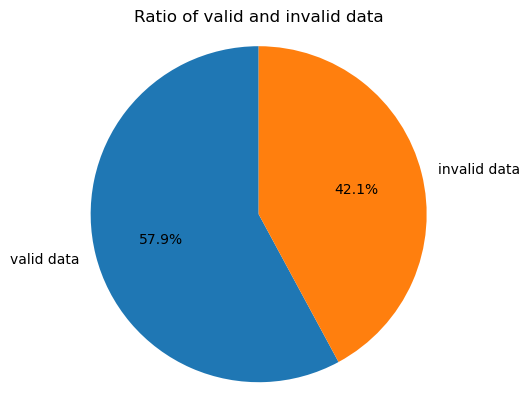

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
# Define two variables
valid_data = 0
invalid_data = 0
# Steps other than 0 are valid data and steps 0 are invalid data
for index, row in wrkData.iterrows():
    if row["Steps00":"Steps59"].sum() == 0:
        invalid_data += 1
    else:
        valid_data += 1
valid_percentage = valid_data / len( wrkData) * 100
invalid_percentage = invalid_data / len( wrkData) * 100
# pie chart to show the percentage of two variables
labels = ['valid data', 'invalid data']
sizes = [valid_percentage, invalid_percentage]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  
plt.title('Ratio of valid and invalid data')
plt.show()

As depicted in the pie chart above, 59.1% of the data is valid, while the remaining 40.9% has been recorded as 0.

To further understand the patterns of "invalid data", we computed the cumulative number of inactive minutes for each individual ID.

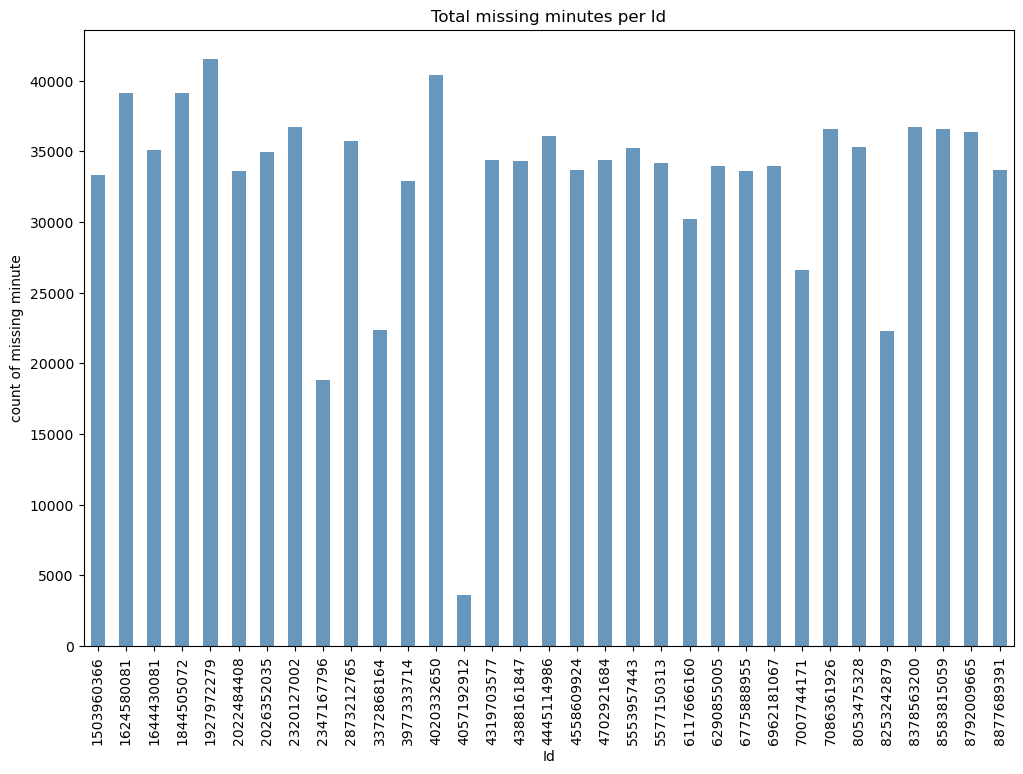

In [7]:
# Make a copy of original dataset to avoid side-affect
wrkData_copy = wrkData.copy()
# Calculate the minutes of missing data per hour
wrkData_copy['MissingMinutes'] = wrkData_copy.loc[:, 'Steps00':'Steps59'].apply(lambda row: sum(row == 0), axis=1)
# Calculate the total number of missing minutes per participant
total_missing_per_id = wrkData_copy.groupby('Id')['MissingMinutes'].sum()

# bar plot to demonstrate the total missing minute of each id
plt.figure(figsize=(12, 8))
total_missing_per_id.plot(kind='bar', color='#6897bb')
plt.title('Total missing minutes per Id')
plt.xlabel('Id')
plt.ylabel('count of missing minute')
plt.show()

According to the above bar plot, it's evident that the total inactive minutes for most participants are relatively consistent. However, participant "4057192912" stands out with a notably higher number of missing minutes compared to the others. This observation can be explained in the Analysis of Observation 1" section, which indicates that only 4 days of data were reported for this participant

Moreover, several reasons could account for the observation of inactive minutes. Participants might not have been walking, could have opted not to wear the device, or there might have been inaccuracies in the device's recording mechanism. Given the consistent number of total inactive minutes observed, it's plausible that the inactivity is due to participants resting, especially considering that data is captured round-the-clock.

Furthermore, the observation of missing minutes, can significantly impact the analysis of participants meeting daily activity recommendations. If inactivity arises from not wearing the device or recording inaccuracies, it might skew the perceived activity levels, either overestimating or underestimating them.

### Data Cleaning

1. Handling datetime attribute: convert the activity hour data in the dataset into standard date data and generate a separate column of these date data

In [8]:
# Extracting the date from 'ActivityHour' and store into new column
wrkData['Date'] = pd.to_datetime(wrkData['ActivityHour'])
# Extract only the date part, but keep it as datetime dtype
wrkData['Date'] = wrkData['Date'].dt.normalize()

2. Filter the dataset into weekday only
    * this is because of our driving problem, we will focus on weekday dataset

In [9]:
wrkData = wrkData[wrkData['Date'].dt.weekday < 5]
# Disabled warning messages
warnings.filterwarnings('ignore')
# dimension of dataset
wrkData.shape

(15496, 64)

After the filtering and adding 'Date', the merged dataset contains 15496 rows and 64 columns

In [10]:
# Checking existence of workday
dates = wrkData['Date'].unique()
for date in dates:
    print(date)

2016-04-13T00:00:00.000000000
2016-04-14T00:00:00.000000000
2016-04-15T00:00:00.000000000
2016-04-18T00:00:00.000000000
2016-04-19T00:00:00.000000000
2016-04-20T00:00:00.000000000
2016-04-21T00:00:00.000000000
2016-04-22T00:00:00.000000000
2016-04-25T00:00:00.000000000
2016-04-26T00:00:00.000000000
2016-04-27T00:00:00.000000000
2016-04-28T00:00:00.000000000
2016-04-29T00:00:00.000000000
2016-05-02T00:00:00.000000000
2016-05-03T00:00:00.000000000
2016-05-04T00:00:00.000000000
2016-05-05T00:00:00.000000000
2016-05-06T00:00:00.000000000
2016-05-09T00:00:00.000000000
2016-05-10T00:00:00.000000000
2016-05-11T00:00:00.000000000
2016-05-12T00:00:00.000000000


Above code verifies that we have successfully isolated the step count data pertaining to weekdays.

3. Exclude the participant labeled as "4057192912" since they have records for only 4 days.
   * Refer to the analysis of missing data

In [11]:
#Remove extreme data
wrkData = wrkData[wrkData['Id'] != 4057192912]

Confirming the successful removal:

In [12]:
# dimension of dataset
wrkData.shape

(15432, 64)

The final cleaned dataset has 15432 columns and 64 rows

## Data Analysis

Based on our driving problem, we must assess two criteria to determine if the participant has satisfy them:

1. The participant should engage in activity for a minimum of 30 minutes daily.
2. A moderate activity level is defined by a daily step count ranging from 7,500 to 10,000 steps.


A function has been developed to modularize the code, enabling us to perform analysis on any participant within the dataset.
This function takes the following parameters:
1. Id: The unique identifier for each participant.
2. wrkData: A merged dataset combining minuteSteps and hourlySteps data.

Upon execution, this function generates a new dataframe comprising following variables:
* 'ZeroCount': The number of minutes per day the participant was inactive.
* 'ExerciseMins': The duration, in minutes, the participant was active each day.
* 'StepTotal': The aggregate step count taken by the participant daily.
* 'AvgStep/Mins': The daily average of steps taken per minute.
* 'Satisfy': Indicates if the participant satisfy both criteria.

In [13]:
def create_new_df(Id, wrkData):
    participant = wrkData[wrkData["Id"] == Id]
    # total minutes of a day
    total = 60*24
    # Calculating the number of zeros that appeared in a row
    participant['ZeroCount'] = participant.apply(lambda row: (row == 0).sum(), axis=1)
    # Check if 'ZeroCount' exceeds 60 and set it to 60 if it does
    participant.loc[participant['ZeroCount'] > 60, 'ZeroCount'] = 60
    # Calculate the number of non-zero minutes per day
    df = participant.groupby('Date')['ZeroCount'].sum().reset_index()

    df['ExerciseMins'] = total - df['ZeroCount']

    # calculate the total number of steps daily
    df['StepTotal'] = participant.groupby('Date')['StepTotal'].sum().reset_index()['StepTotal']
    # Calculate the average steps per minute
    # round to 2dp because it is a standard convention
    df['AvgStep/Mins'] = round(df['StepTotal']/df['ExerciseMins'],2)
    
    df['Satisfy'] = (df['ExerciseMins'] > 30) & (df['StepTotal'] > 7500)
    
    return df

### All Participant

Generate a new dataframe to calculate if every participants have meet both requirements

In [14]:
#Filter each different participant
unique_ids = wrkData['Id'].unique()
# Create a new DataFrame
result_df = pd.DataFrame()
# Traverse each participant
for uid in unique_ids:
# Create a new DataFrame based on uid and wrkData
    df = create_new_df(uid, wrkData)
    df['Id'] = uid
# Merge two datasets
    result_df = pd.concat([result_df, df], ignore_index=True)
# The data is sorted by the Id column, and if the Id are the same, they are sorted by Date
result_df = result_df.sort_values(by=['Id', 'Date']).reset_index(drop=True)
result_df

,Date,ZeroCount,ExerciseMins,StepTotal,AvgStep/Mins,Satisfy,Id
0,2016-04-13,1183,257,10735,41.77,True,1503960366
1,2016-04-14,1218,222,10460,47.12,True,1503960366
2,2016-04-15,1168,272,9685,35.61,True,1503960366
3,2016-04-18,1149,291,13019,44.74,True,1503960366
4,2016-04-19,1095,345,15506,44.94,True,1503960366
...,...,...,...,...,...,...,...
649,2016-05-06,1117,323,21622,66.94,True,8877689391
650,2016-05-09,1138,302,20156,66.74,True,8877689391
651,2016-05-10,1187,253,10693,42.26,True,8877689391
652,2016-05-11,1135,305,21391,70.13,True,8877689391


Calculate the number of days of each participant met the criteria

In [15]:
# Calculate the number of days to meet driving issues
satisfy_counts = result_df.groupby('Id')['Satisfy'].sum() 

Visualising our result:

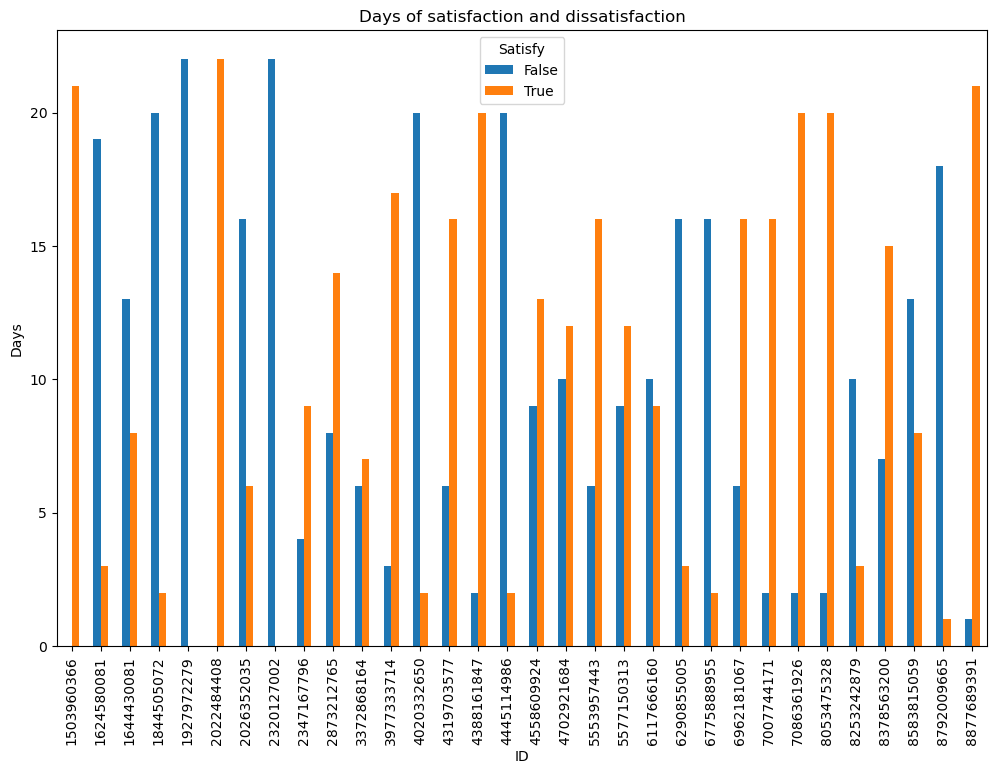

In [16]:
# Obtain a data table containing the participant's ID and qualified results
result = result_df.groupby(['Id', 'Satisfy']).size().unstack().fillna(0)
# Draw a side-by-side bar chart and Set image parameters
result.plot(kind='bar', stacked=False, figsize=(12, 8))
# Establish Title
plt.title('Days of satisfaction and dissatisfaction')
# Naming the y-axis and x-axis
plt.ylabel('Days')
plt.xlabel('ID')
# Demonstrate the graph
plt.show()

Based on the side-by-side bar chart generated, the orange bar indicates the number of days a participant did meet the criteria, while the blue bar shows the days they didn't. Clearly, the majority of participants did meet both criteria during the observed period.

### Individual Analysis

Calculating the percentage of participant satisfy both requirements

In [17]:
def calculate_satisfy_rate(df):
    # calculate the percentage of participant satisfy both requirements
    true_percentage = round((df['Satisfy'].sum() / len(df)) * 100, 2)
    false_percentage = round(100 - true_percentage, 2)
    
    result = [true_percentage, false_percentage]
    return result

Drawing a pie chart to visualise the calculated satisfy rate of participant

In [18]:
# Using matplotlib.pyplot library to draw the pie chart
import matplotlib.pyplot as plt

def create_pie_chart(Id, df):
    
    # Based on the above information about "calculate_satisfy_rate" function to calculate the satisfaction rate
    satisfy_rates = calculate_satisfy_rate(df)
    
    # Parameters related to pie chart
    labels = ['Satisfy', 'Not Satisfy']
    percentages = satisfy_rates
    colors = ['green', 'red']
    plt.figure(figsize=(6, 6))
    plt.pie(percentages, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(f'Satisfy Rate for {Id}')
    
    # Draw the pie chart
    plt.show()

In [19]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def create_step_total_bar(Id, wrkData):

    df = create_new_df(Id, wrkData)
    df.fillna(0, inplace=True)

    # Set style
    plt.style.use('seaborn-white')

    # Filter data for 'satisfy' column to set bar colors
    colors = ['lightgreen' if satisfy else 'salmon' for satisfy in df['Satisfy']]

    # Create the bar chart for StepTotal
    fig, ax1 = plt.subplots(figsize=(15, 8))
    ax1.bar(df['Date'], df['StepTotal'], color=colors)
    ax1.set_ylabel('StepTotal')

    # Customize the plot
    plt.xlabel('Date')
    plt.title(str(Id) + ' StepTotal in Weekday')
    ax1.set_xticks(df['Date'])
    ax1.set_xticklabels(df['Date'].dt.strftime('%m-%d'), rotation=45)

    # Define legend patches
    satisfy_patch = mpatches.Patch(color='lightgreen', label='Satisfy')
    not_satisfy_patch = mpatches.Patch(color='salmon', label='Not Satisfy')
    
    # Add the legend to the plot
    ax1.legend(handles=[satisfy_patch, not_satisfy_patch], loc='upper left')

    # Remove grid lines
    plt.grid(False)

    # Show the plot
    plt.tight_layout()
    plt.show()


In [27]:
def create_step_ExerciseMins(Id, wrkData):

    df = create_new_df(Id, wrkData)
    df.fillna(0, inplace=True)

    # Set style
    plt.style.use('seaborn-white')

    # Create the bar chart for StepTotal
    fig, ax1 = plt.subplots(figsize=(15, 8))
    ax1.plot(df['Date'], df['ExerciseMins'], color='red', label='ExerciseMins', marker='o')
    ax1.set_ylabel('ExerciseMins')

    # Customize the plot
    plt.xlabel('Date')
    plt.title(str(Id) + ' ExerciseMins in Weekday')
    ax1.set_xticks(df['Date'])
    ax1.set_xticklabels(df['Date'].dt.strftime('%m-%d'), rotation=45)

    # Define legend patches
    satisfy_patch = mpatches.Patch(color='lightgreen', label='Satisfy')
    not_satisfy_patch = mpatches.Patch(color='salmon', label='Not Satisfy')
    
    # Add the legend to the plot
    ax1.legend(handles=[satisfy_patch, not_satisfy_patch], loc='upper left')

    # Remove grid lines
    plt.grid(False)

    # Show the plot
    plt.tight_layout()
    plt.show()


Since our code can perform the analysis for any participant, we will choose some representative participant to demonstrate our result

1. Representative participant 1 with ID: 2873212765 

In [20]:
# Disabled warning messages
warnings.filterwarnings('ignore')
# testing if function works
participant_1 = create_new_df(2873212765 , wrkData)

In [21]:
calculate_satisfy_rate(participant_1)

[63.64, 36.36]

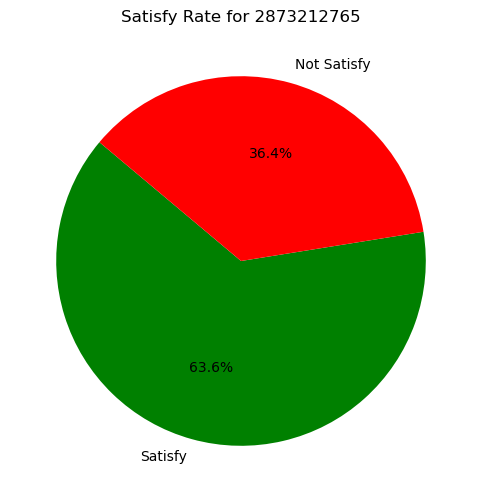

In [22]:
create_pie_chart(2873212765,participant_1)

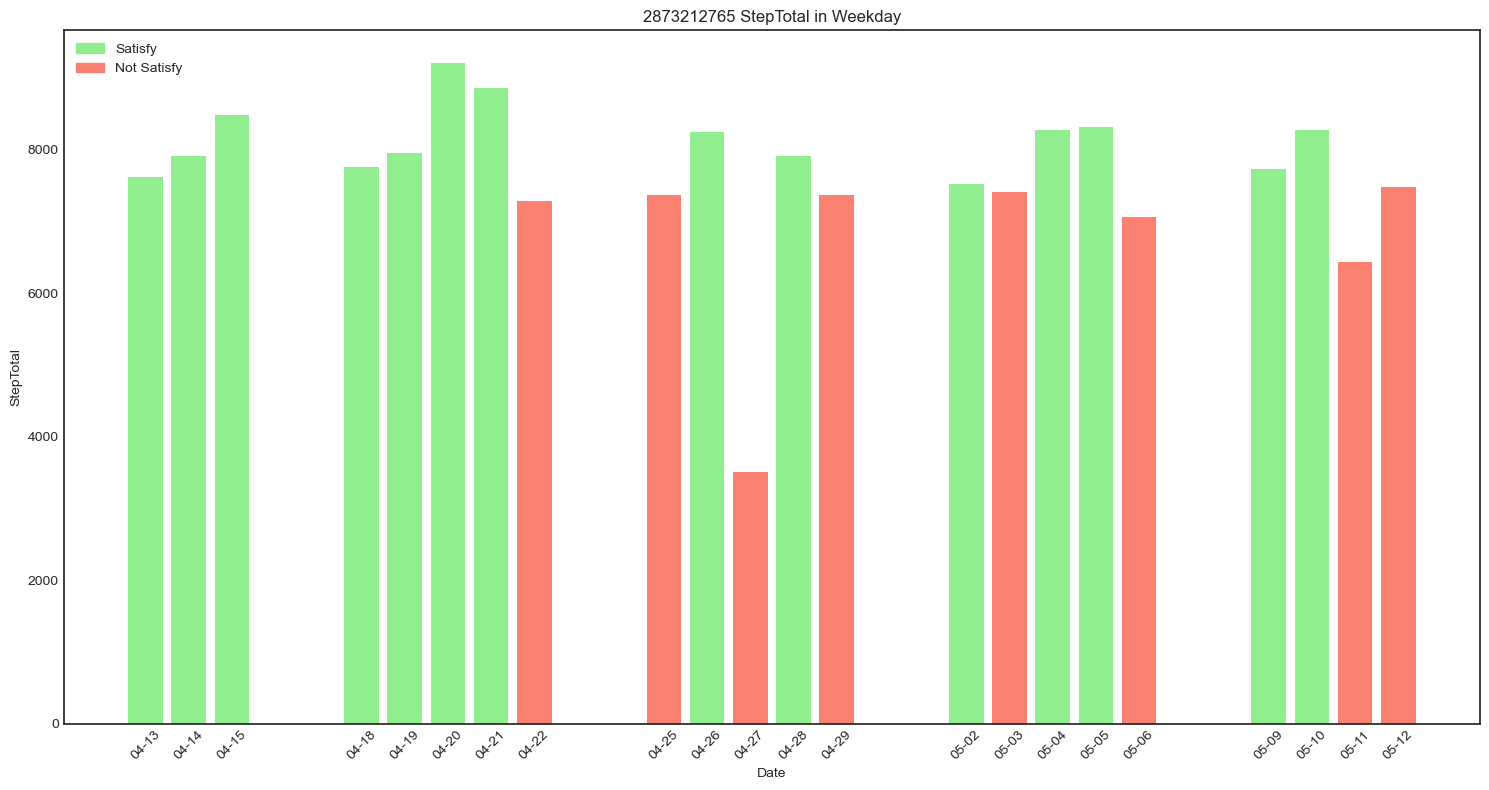

In [23]:
create_step_total_bar(2873212765, wrkData)

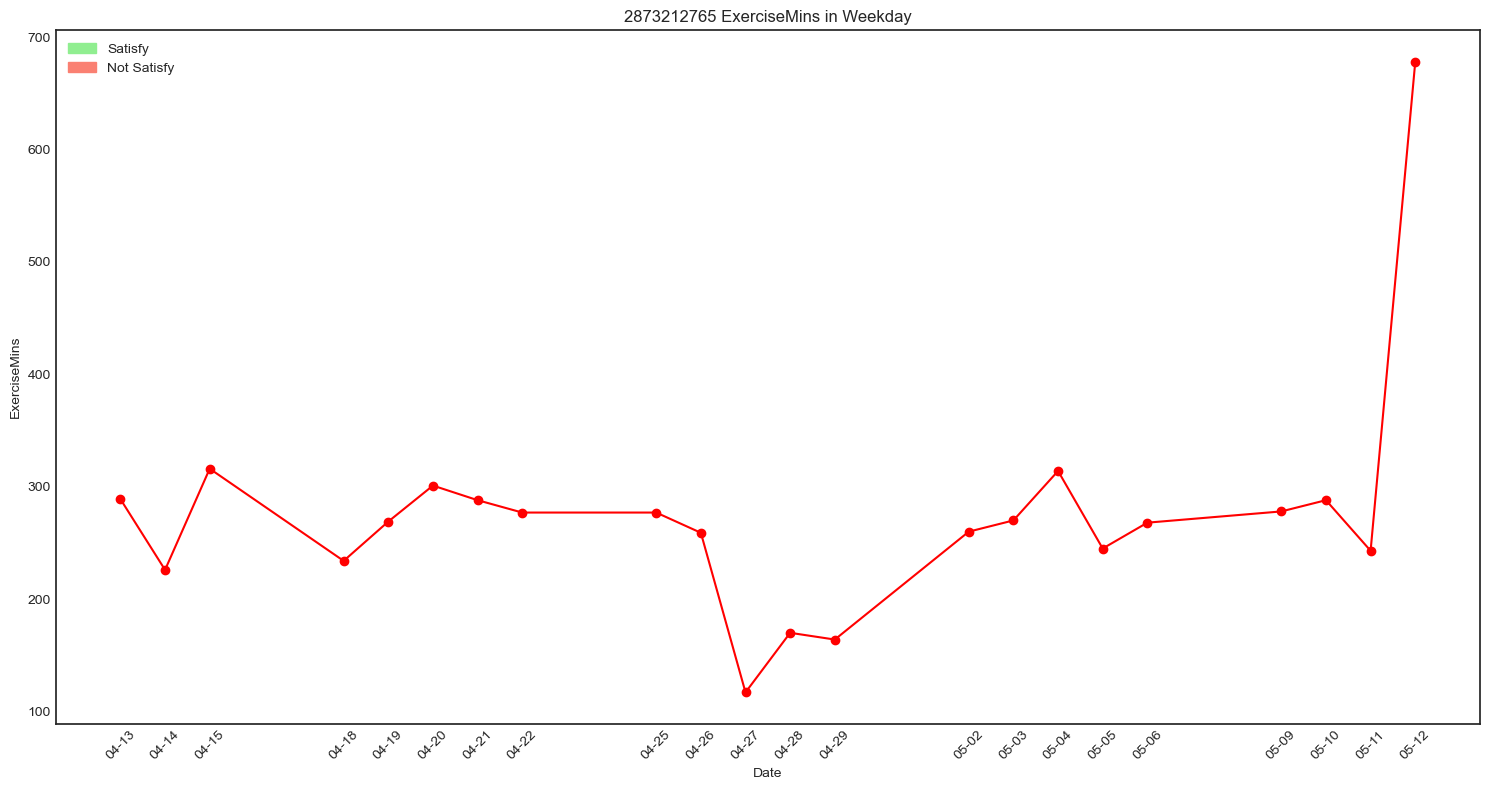

In [28]:
create_step_ExerciseMins(2873212765, wrkData)